In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('creditcard.csv')
print("Dataset preview : ")
df.head()

Dataset preview : 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
correlation = df.corr()['Class'].sort_values(ascending=False)
print("\nFeature correlation with Class:\n", correlation)


Feature correlation with Class:
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


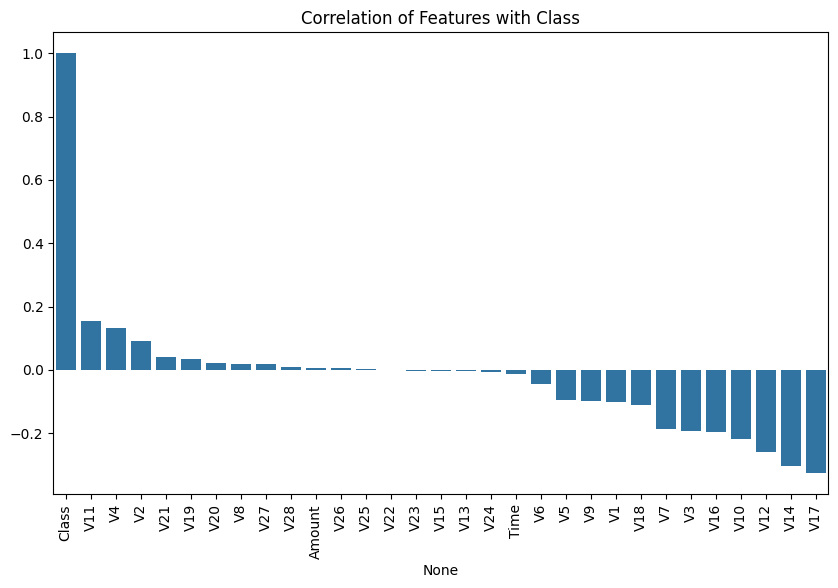

In [ ]:

# Visualize top correlated features
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Class")
plt.show()

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[["Time", "Amount"]] = scaler.fit_transform(X[["Time", "Amount"]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1= DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Decision tree metrics : ")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nConfusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report :")
print(classification_report(y_test,y_pred))

Decision tree metrics : 
Accuracy :  0.9994557775359011

Confusion matrix :
[[56855     9]
 [   22    76]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



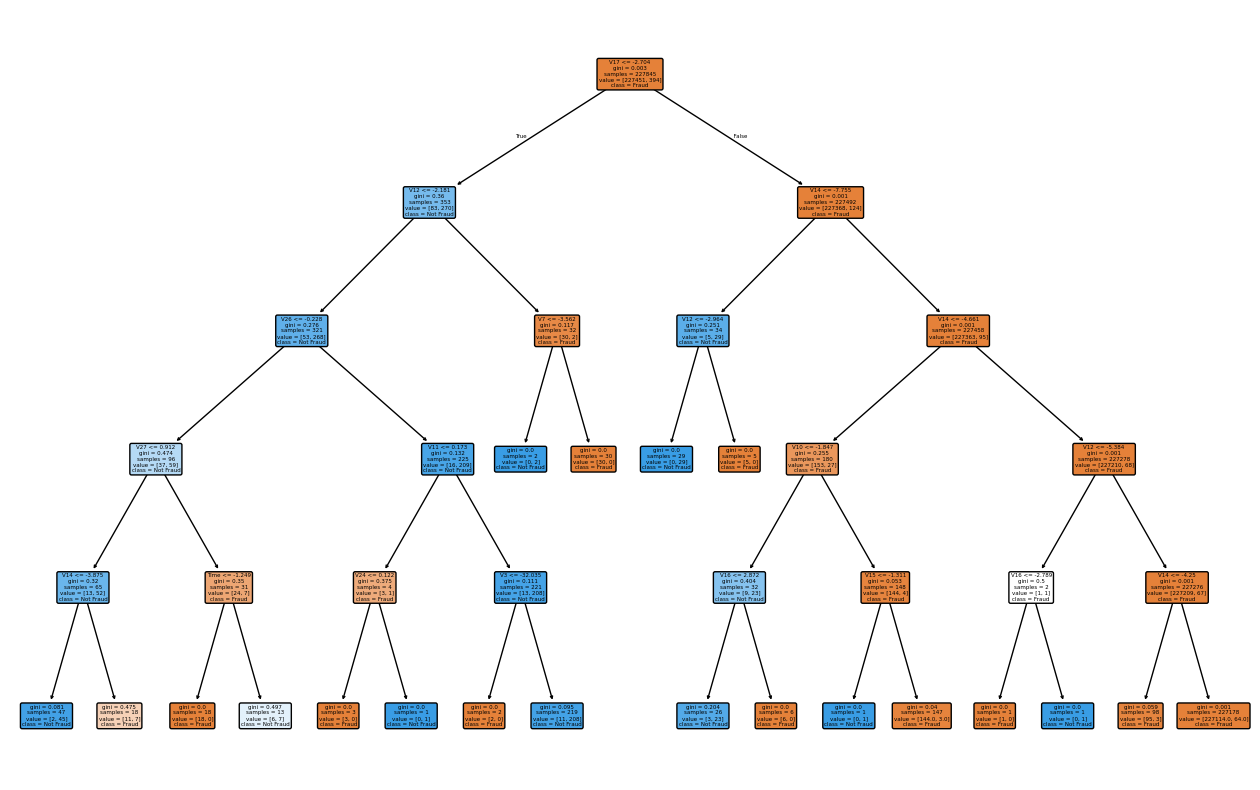

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(
    model1,
    feature_names=X.columns,
    class_names=['Fraud','Not Fraud'],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(
    n_estimators=10,
    random_state=42,
    max_depth=4
)
model2.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=42)

In [ ]:
y_pred=model2.predict(X_test)

In [ ]:
print("Random Forest matrics : ")
print("Accuracy score : ",accuracy_score(y_test, y_pred))
print("\nConfusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report :")
print(classification_report(y_test,y_pred))

Random Forest matrics : 
Accuracy score :  0.9992099996488887

Confusion matrix :
[[56856     8]
 [   37    61]]

Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



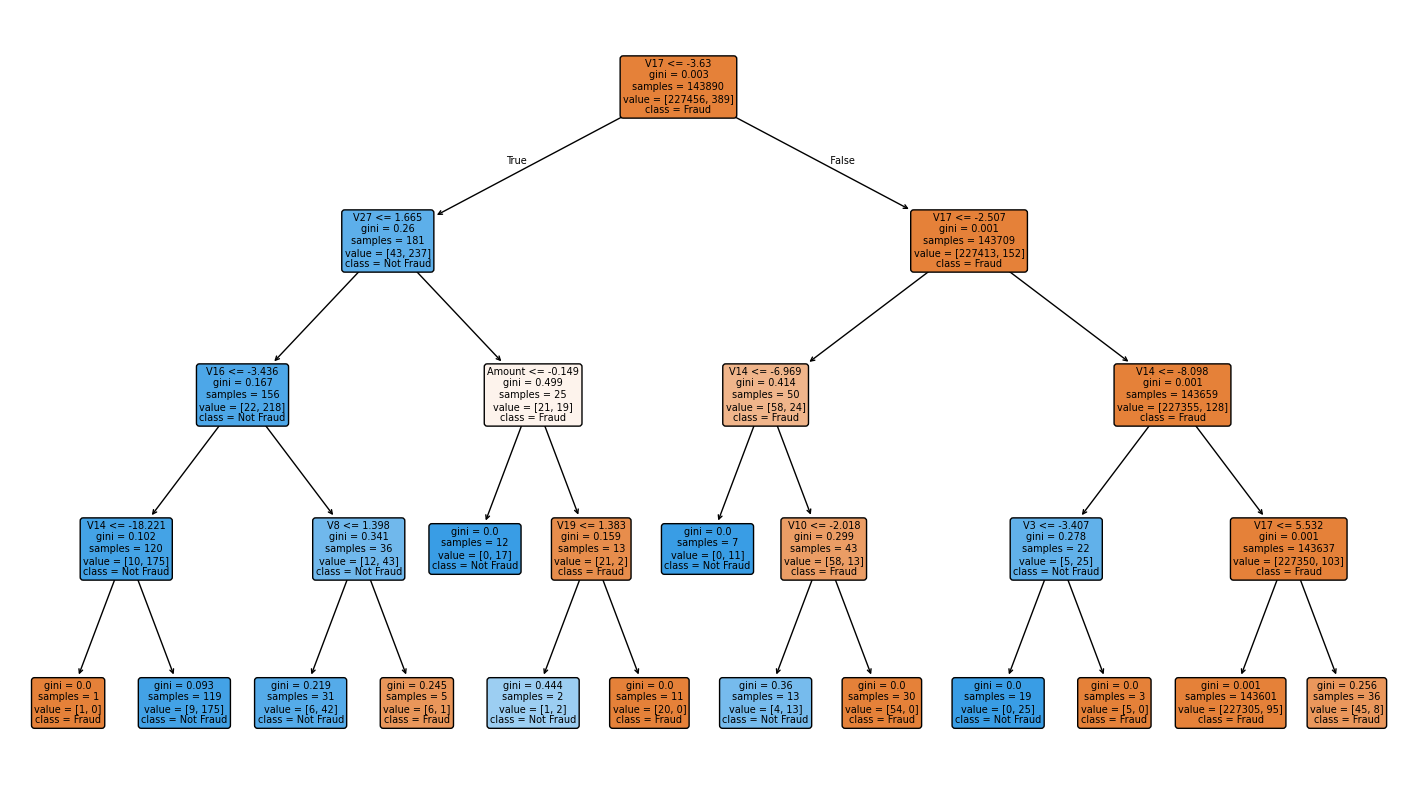

In [ ]:
first_tree = model2.estimators_[0]

plt.figure(figsize=(18,10))
plot_tree(
    first_tree,
    feature_names=X.columns,
    class_names=['Fraud', 'Not Fraud'],
    filled=True,
    rounded=True
)
plt.show()